1. Скачайте Titanic dataset и загрузите его в pandas.DataFrame; выведите первые 5 записей в ноутбук. Как можно интерпретировать данную таблицу?

In [97]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib 
import numpy as np
import sklearn as skl
import sklearn.linear_model as lm

%matplotlib inline

df=pd.read_csv(r'C:\Users\шмидт\Desktop\Labs\train.csv')

df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Мы имеем таблицу с данными, в которой собраны сведения по пассажирам Титаника. Каждая строка содержит информацию по конкретному пассажиру. Эти сведения о следующем:
1. Идентификатор записи
2. Признак, выжил ли пассажир
3. Класс, в котором ехал пассажир
4. Имя пассажира
5. Пол
6. Возраст
7. Кол-во братьев/сестер на борту
8. Кол-во детей/родителей на борту
9. Номер каюты
10. Место посадки пассажира.

2.Получите имена столбцов

In [8]:
list(df.columns.values)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

3.Перемешайте строки в случайном порядке

In [19]:
dfsam = df.sample(n=df.shape[0])
dfsam.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.00,F2,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.75,NaN,Q
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.00,D56,S
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.50,A26,C
489,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9.0,1,1,C.A. 37671,15.90,NaN,S


4.Получите случайную подвыборку данных с возвращением и без.

In [ ]:
dfsam_rep = df.sample(n=10, replace=True)
dfsam_ran = df.sample(n=10, replace=False)

5.Разбейте данные случайным образом на две непересекающиеся подвыборки

In [24]:
sample1=df.sample(frac=0.5)
sample2=df.drop(sample1.index)

(445, 12)

6.Проверьте, является ли признак Name уникальным для каждого пассажира, если да, то сделайте его новым индексом данных

In [35]:
uni = pd.Index.unique(df['Name'])
sum(df['Name'] == uni) - df.shape[0]

0

In [ ]:
Вектор сравнений уникальных имен по элементно равен вектору имен, т.е. все имена уникальны.
Переиндексирование по именам пассажиров:

In [45]:
df_reindex = df.reindex(df['Name'])

7.Проверьте, содержат ли данные пропуски, если да, то заполните их

In [47]:
df.isnull().values.any()

True

Да, в данных есть пропуски, заполним их нулями

In [49]:
df_full = df.fillna(value=0)
df_full.isnull().values.any()

False

Да, все пропуски заменены на нули.

8.Определите, как много пассажиров ехало первым классом

In [53]:
sum(df['Pclass']==1)

216

9.Постройте гистограмму возрастов пассажиров

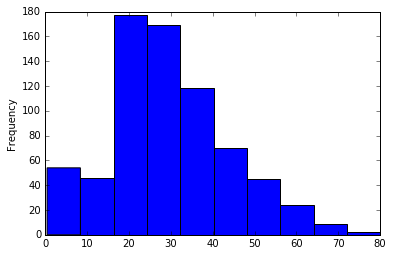

In [62]:
df['Age'].plot.hist()

10.Определите средний возраст пассажиров, медианный возраст, дисперсию

In [138]:
{'mean': round(df['Age'].mean(),2), 'median':round(df['Age'].median(),2), 'variance':round(np.var(df['Age']),1)}


{'mean': 29.7, 'median': 28.0, 'variance': 210.7}

11.* Добавьте признак, который показывает, какой процент пассажиров имели возраст меньше, чем данный пассажир

In [121]:
s=0
m=list(range(df.shape[0]))
for x in df.index:
    for y in df.index:
        s+=df['Age'][x]>df['Age'][y]
    
    m[x]=s/df.shape[0]
    s=0

df['% lower Age'] = pd.Series(m,index=df.index)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,% lower Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.228956
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.590348
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.337823
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.537598
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.537598


12.Коррелируют ли число братьев/сестер с числом родителей/детей?

In [141]:
df.corr()['SibSp']['Parch']


0.41483769862015263

Положительная корреляция есть, но она не очень велика.

13.Какое самое популярное женское имя на корабле?

In [169]:
df['Name'][df['Sex']=='female'].str.split(' ').apply(pd.Series, 1).stack().value_counts().head(5)



Miss.      182
Mrs.       125
William     15
Mary        13
Anna        11
dtype: int64

Самым популярным именем было WIlliam, вероятно это второе имя. Самым популярным более женским  именем была Mary.

In [ ]:
14.Есть ли зависимость между классом и номером билета?

In [231]:
a = df['Ticket'].str.split(' ').apply(pd.Series,1)
df['TicketNum'] = a.apply(pd.to_numeric, args=('coerce',)).max(axis=1, skipna=True, numeric_only=True)
df.corr()['Pclass']['TicketNum']

0.28627937417032862

Зависимость между классом и номером билета слабая.

15.Какой части пассажиров удалось выжить?

In [233]:
sum(df['Survived'])/df.shape[0]

0.38383838383838381

Выжить удалось 38% пассажиров из этого сета

16.Сделайте визуализацию, позволяющую ответить на вопросы:
    •Верно ли, что женщины выживали чаще мужчин?
    •Верно ли, что чаще выживали пассажиры с более дорогими билетами?


<function matplotlib.pyplot.show>

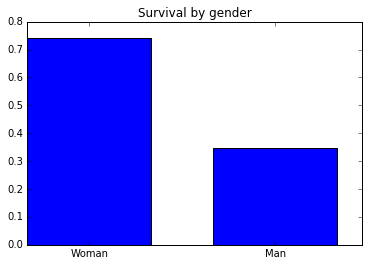

In [56]:
surv = ['0','0']
surv[0] = sum(df[df['Sex'] == 'female']['Survived']) / df[df['Sex'] == 'female']['Survived'].shape[0]
surv[1] = sum(df[df['Sex'] == 'male']['Survived']) / df[df['Sex'] == 'female']['Survived'].shape[0]

index = np.arange(len(surv))
width = 1/1.5
bar_show = plt.bar(index, surv, width, color="blue")
plt.title('Survival by gender')
plt.xticks(index + width/2, ('Woman', 'Man'))

plt.show

Женищины выживали значительно чаще мужчин.

<function matplotlib.pyplot.show>

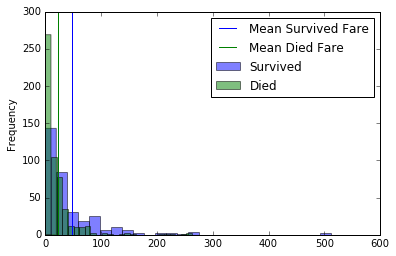

In [134]:
bins_d = round(df['Fare'].max() / 20,0).astype(int)

df[df['Survived']==1]['Fare'].plot.hist(bins = bins_d, alpha=0.5, label='Survived')
df[df['Survived']==0]['Fare'].plot.hist(bins = bins_d, alpha=0.5, label='Died')

plt.axvline(df[df['Survived']==1]['Fare'].mean(), label = 'Mean Survived Fare', color='blue')
plt.axvline(df[df['Survived']==0]['Fare'].mean(), label = 'Mean Died Fare', color='green')

plt.legend(loc='upper right')

plt.show

Похоже люди с более дорогими билетами выживали чаще. Но хороший ответ на этот вопрос даст не столько график, сколько статистический тест отличия средних двух выборок.